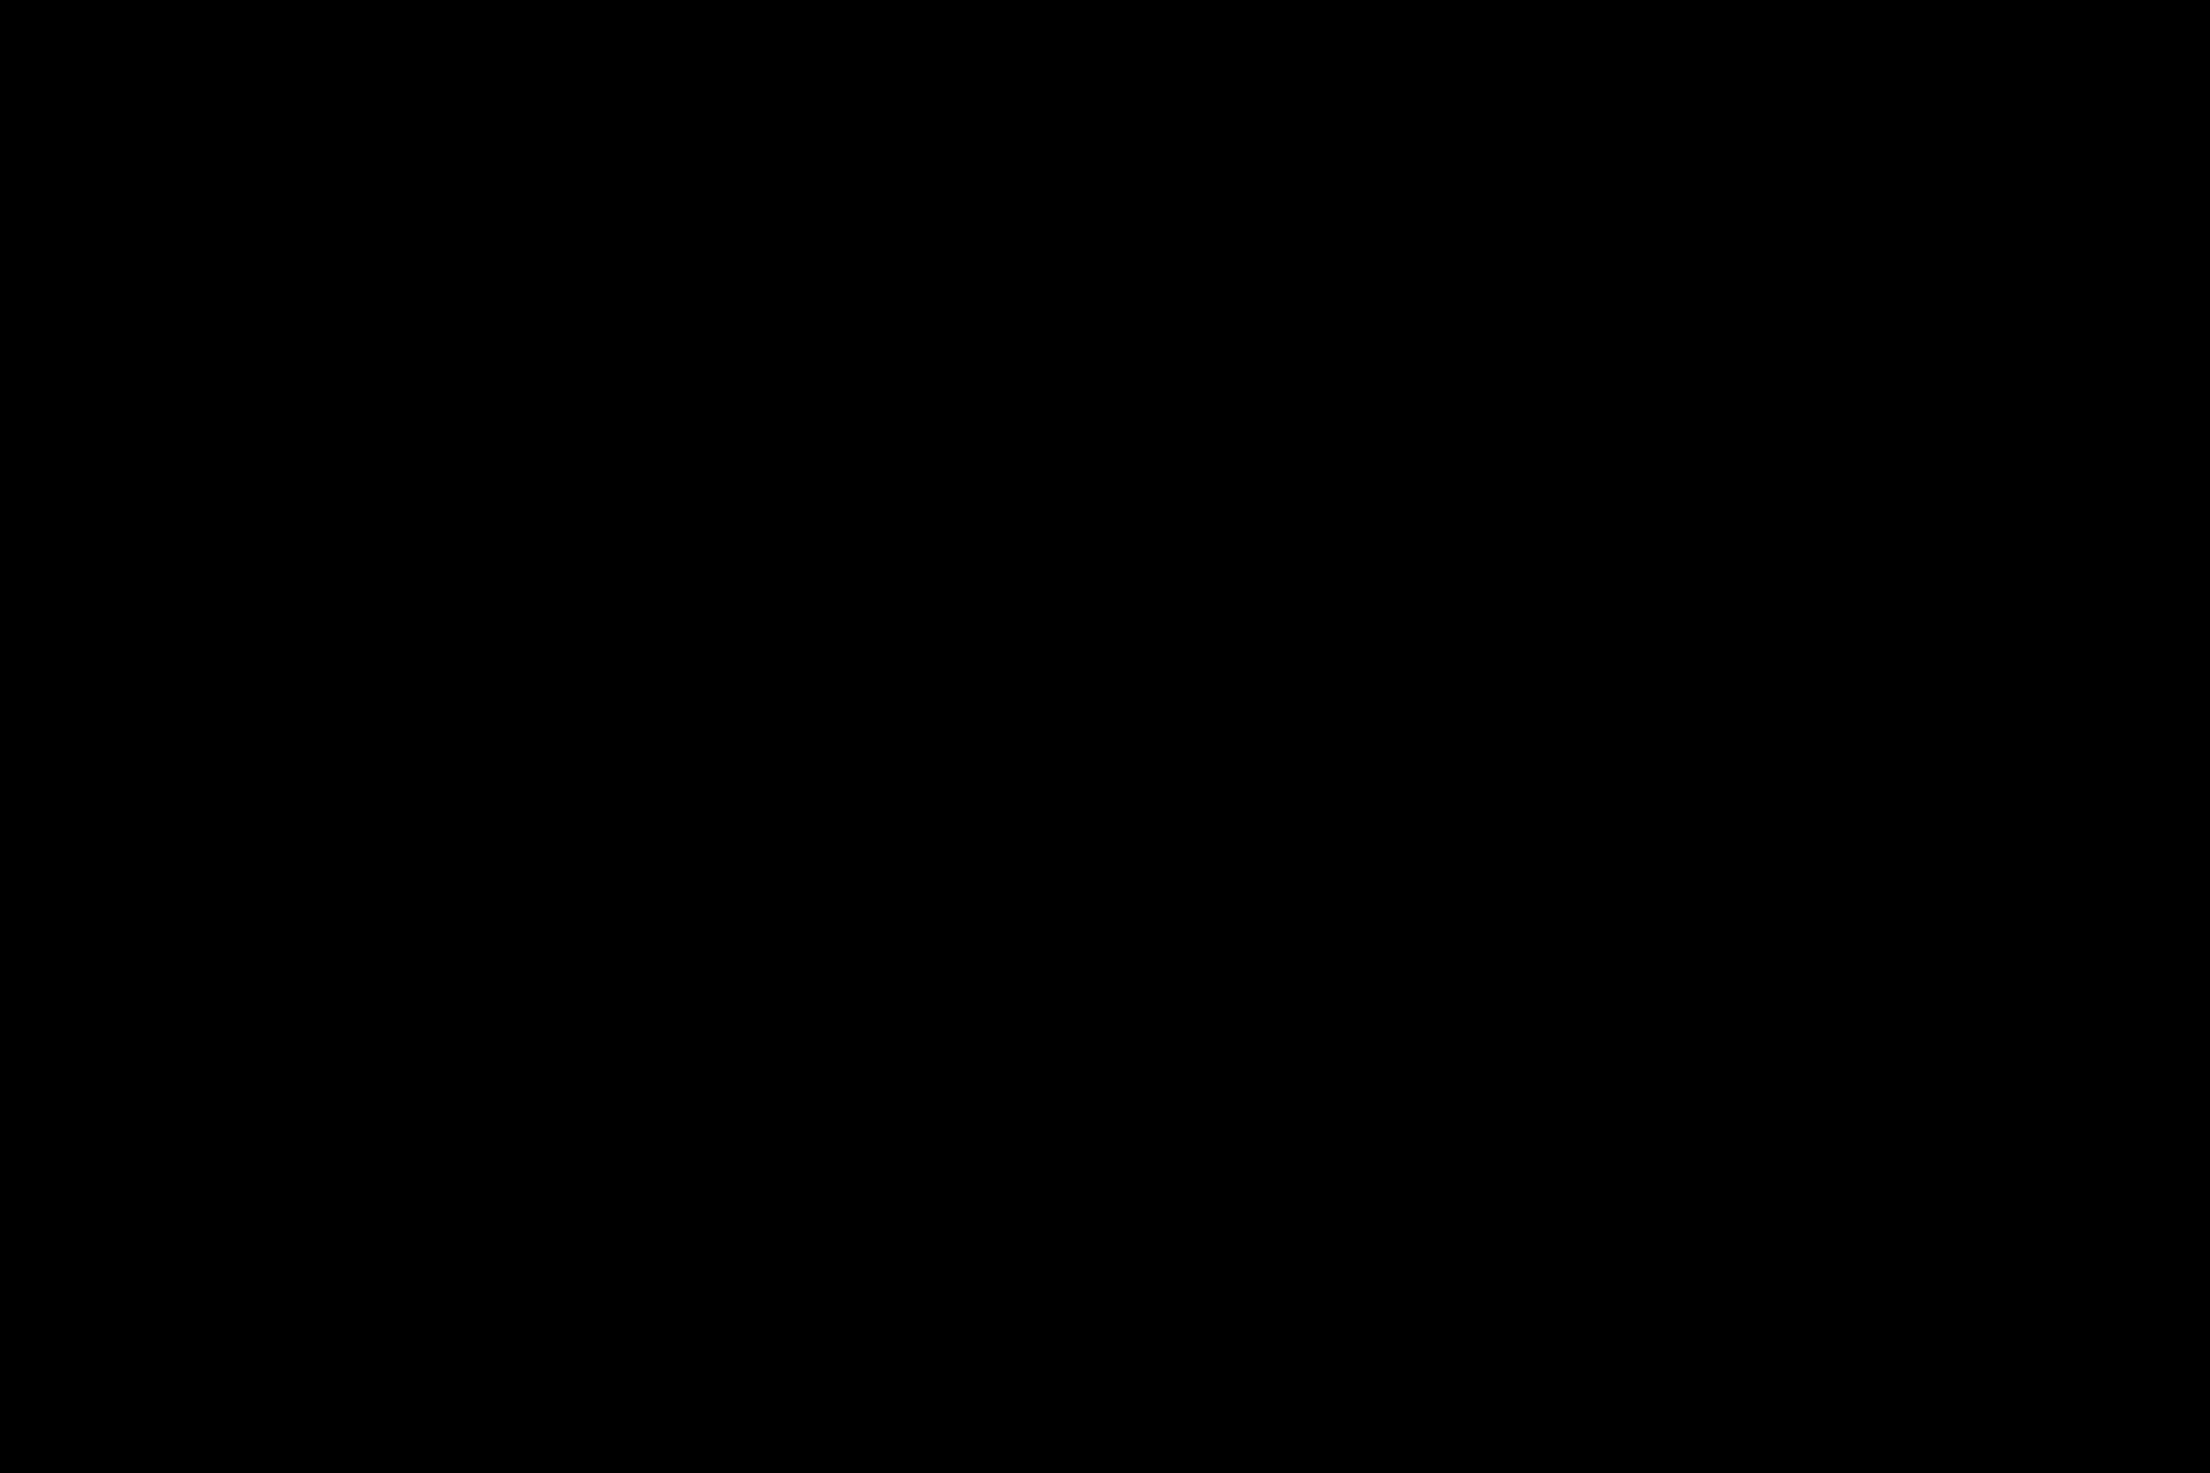

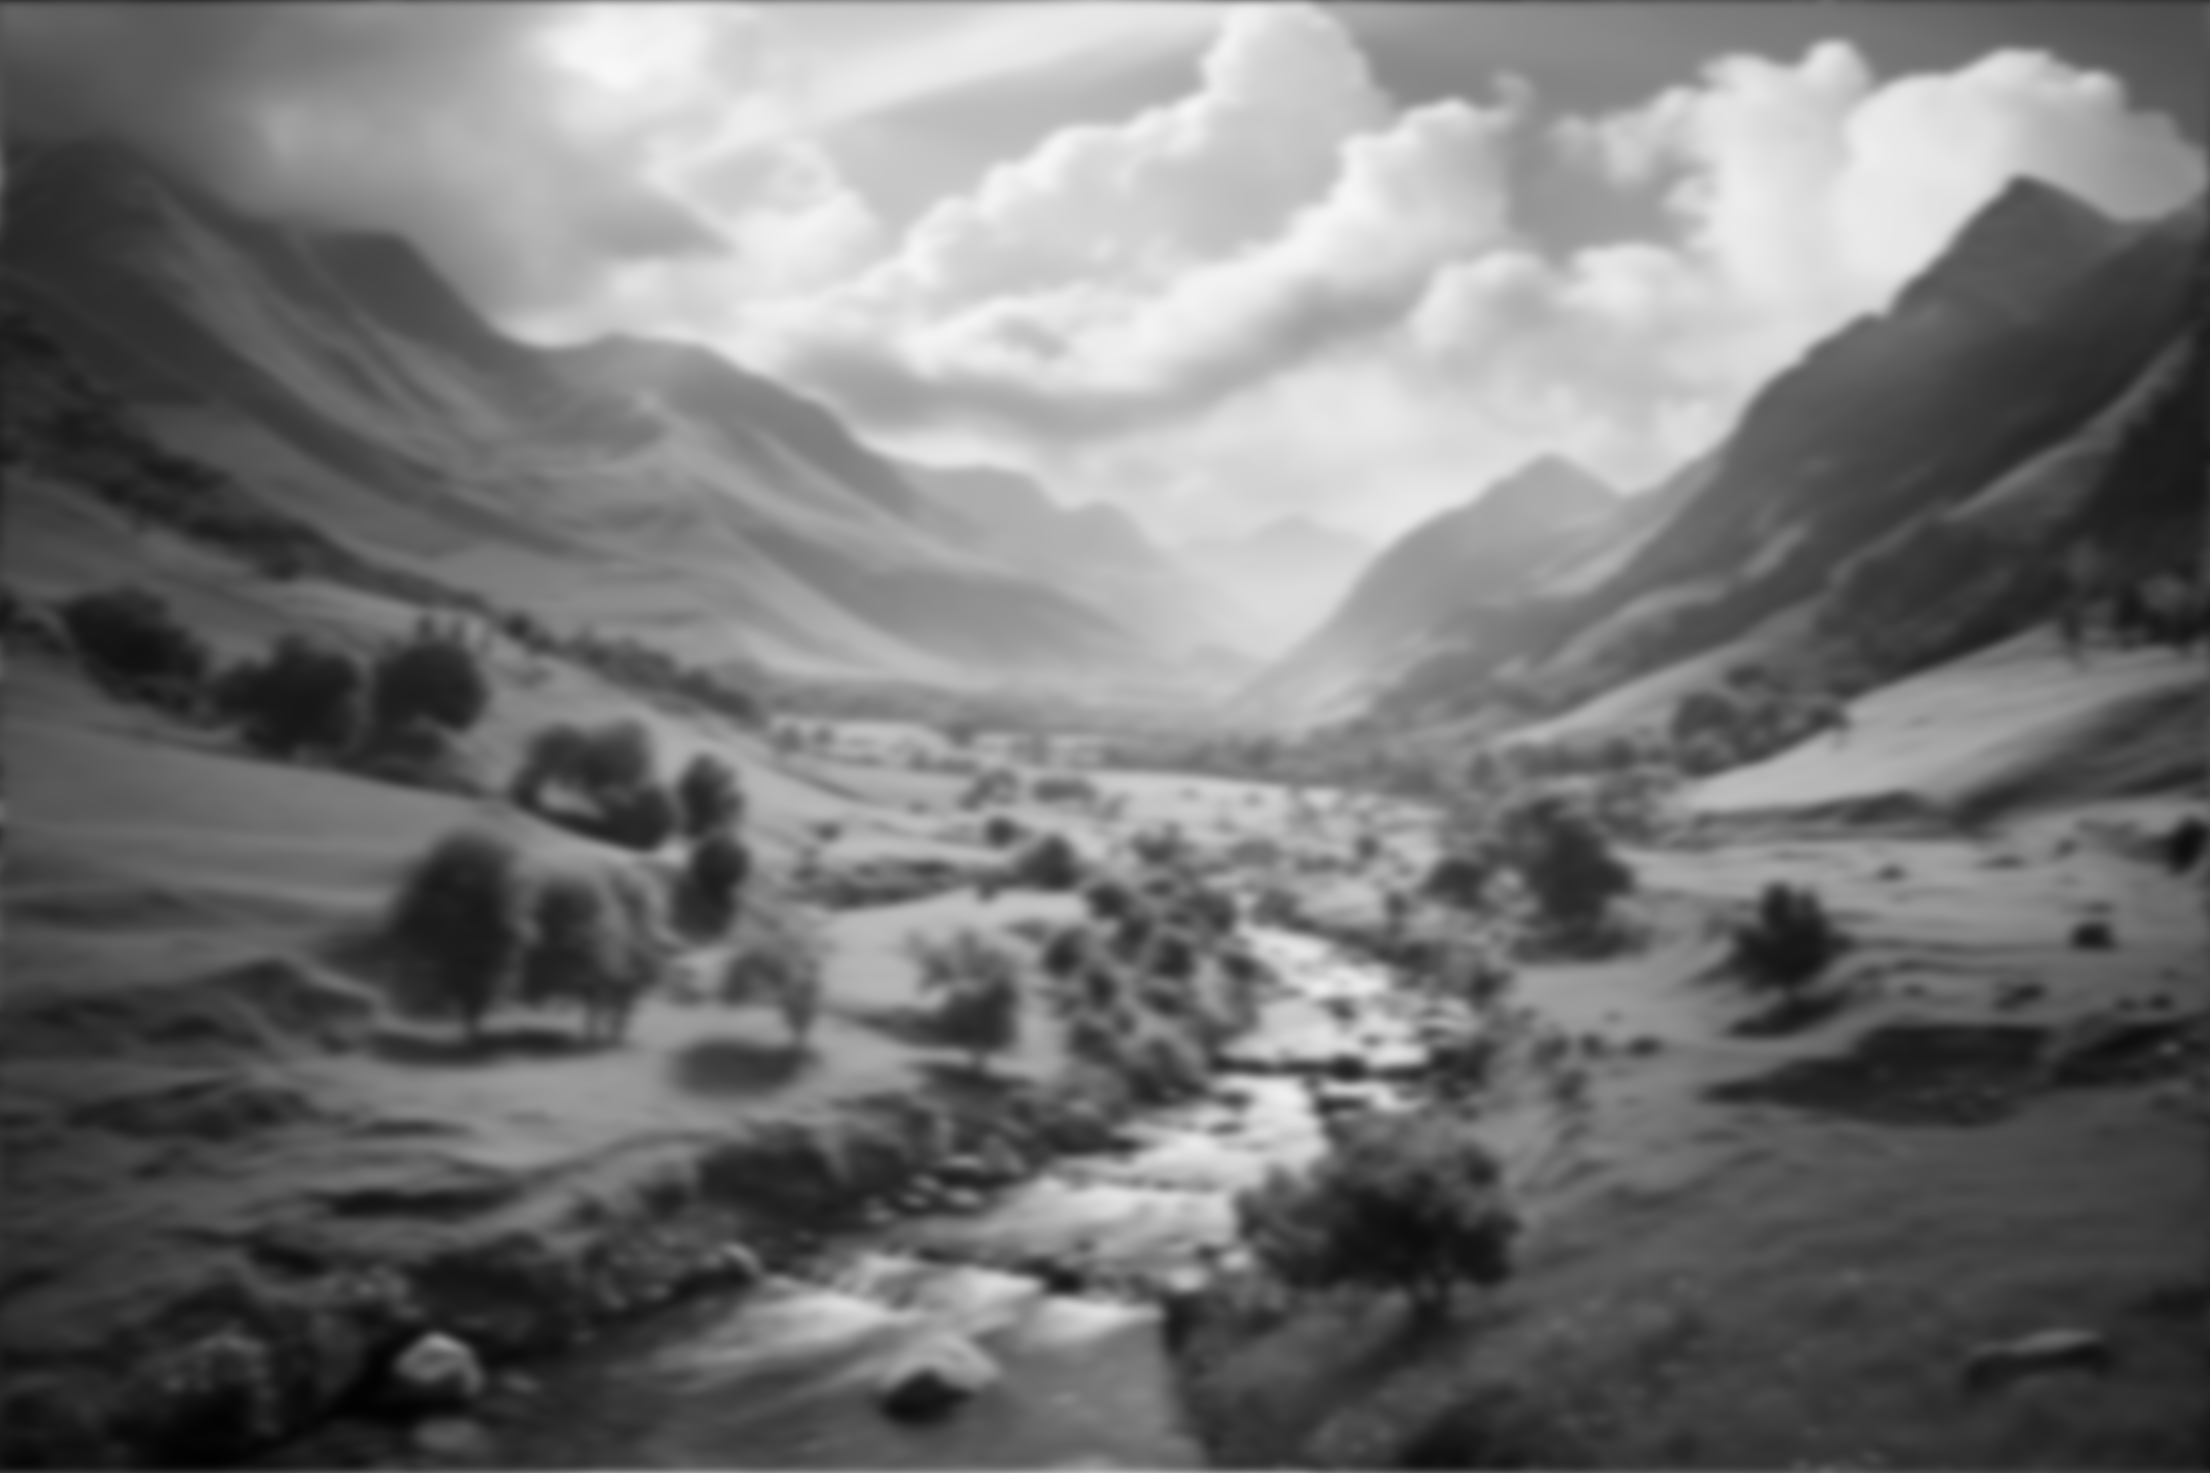

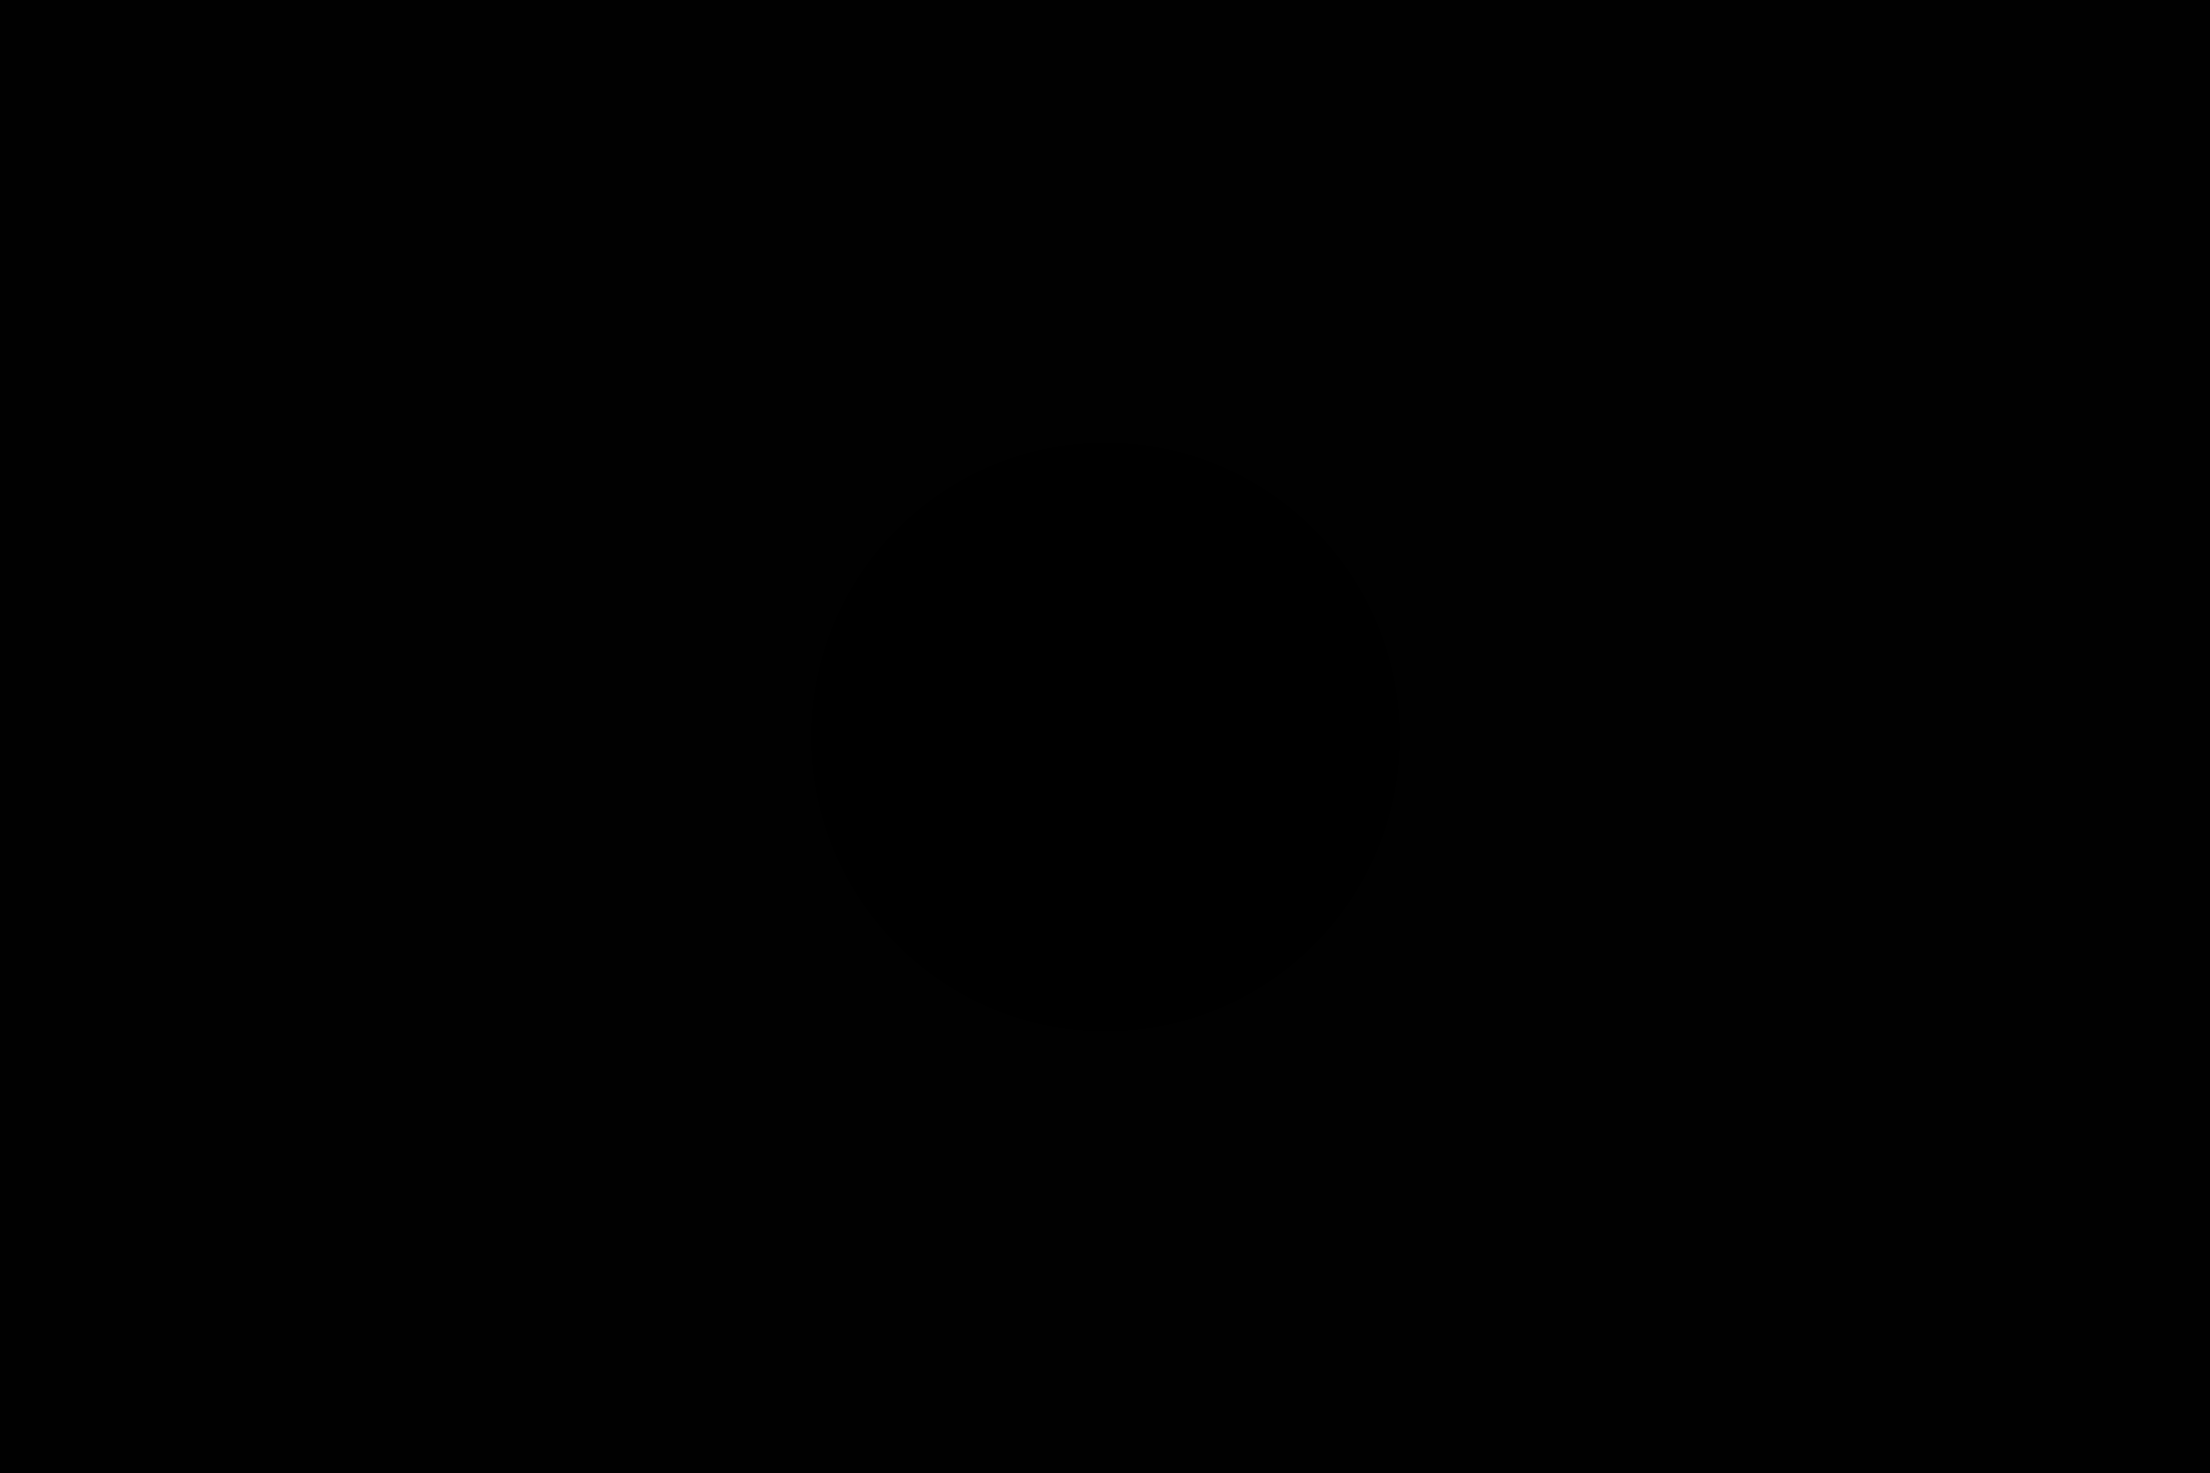

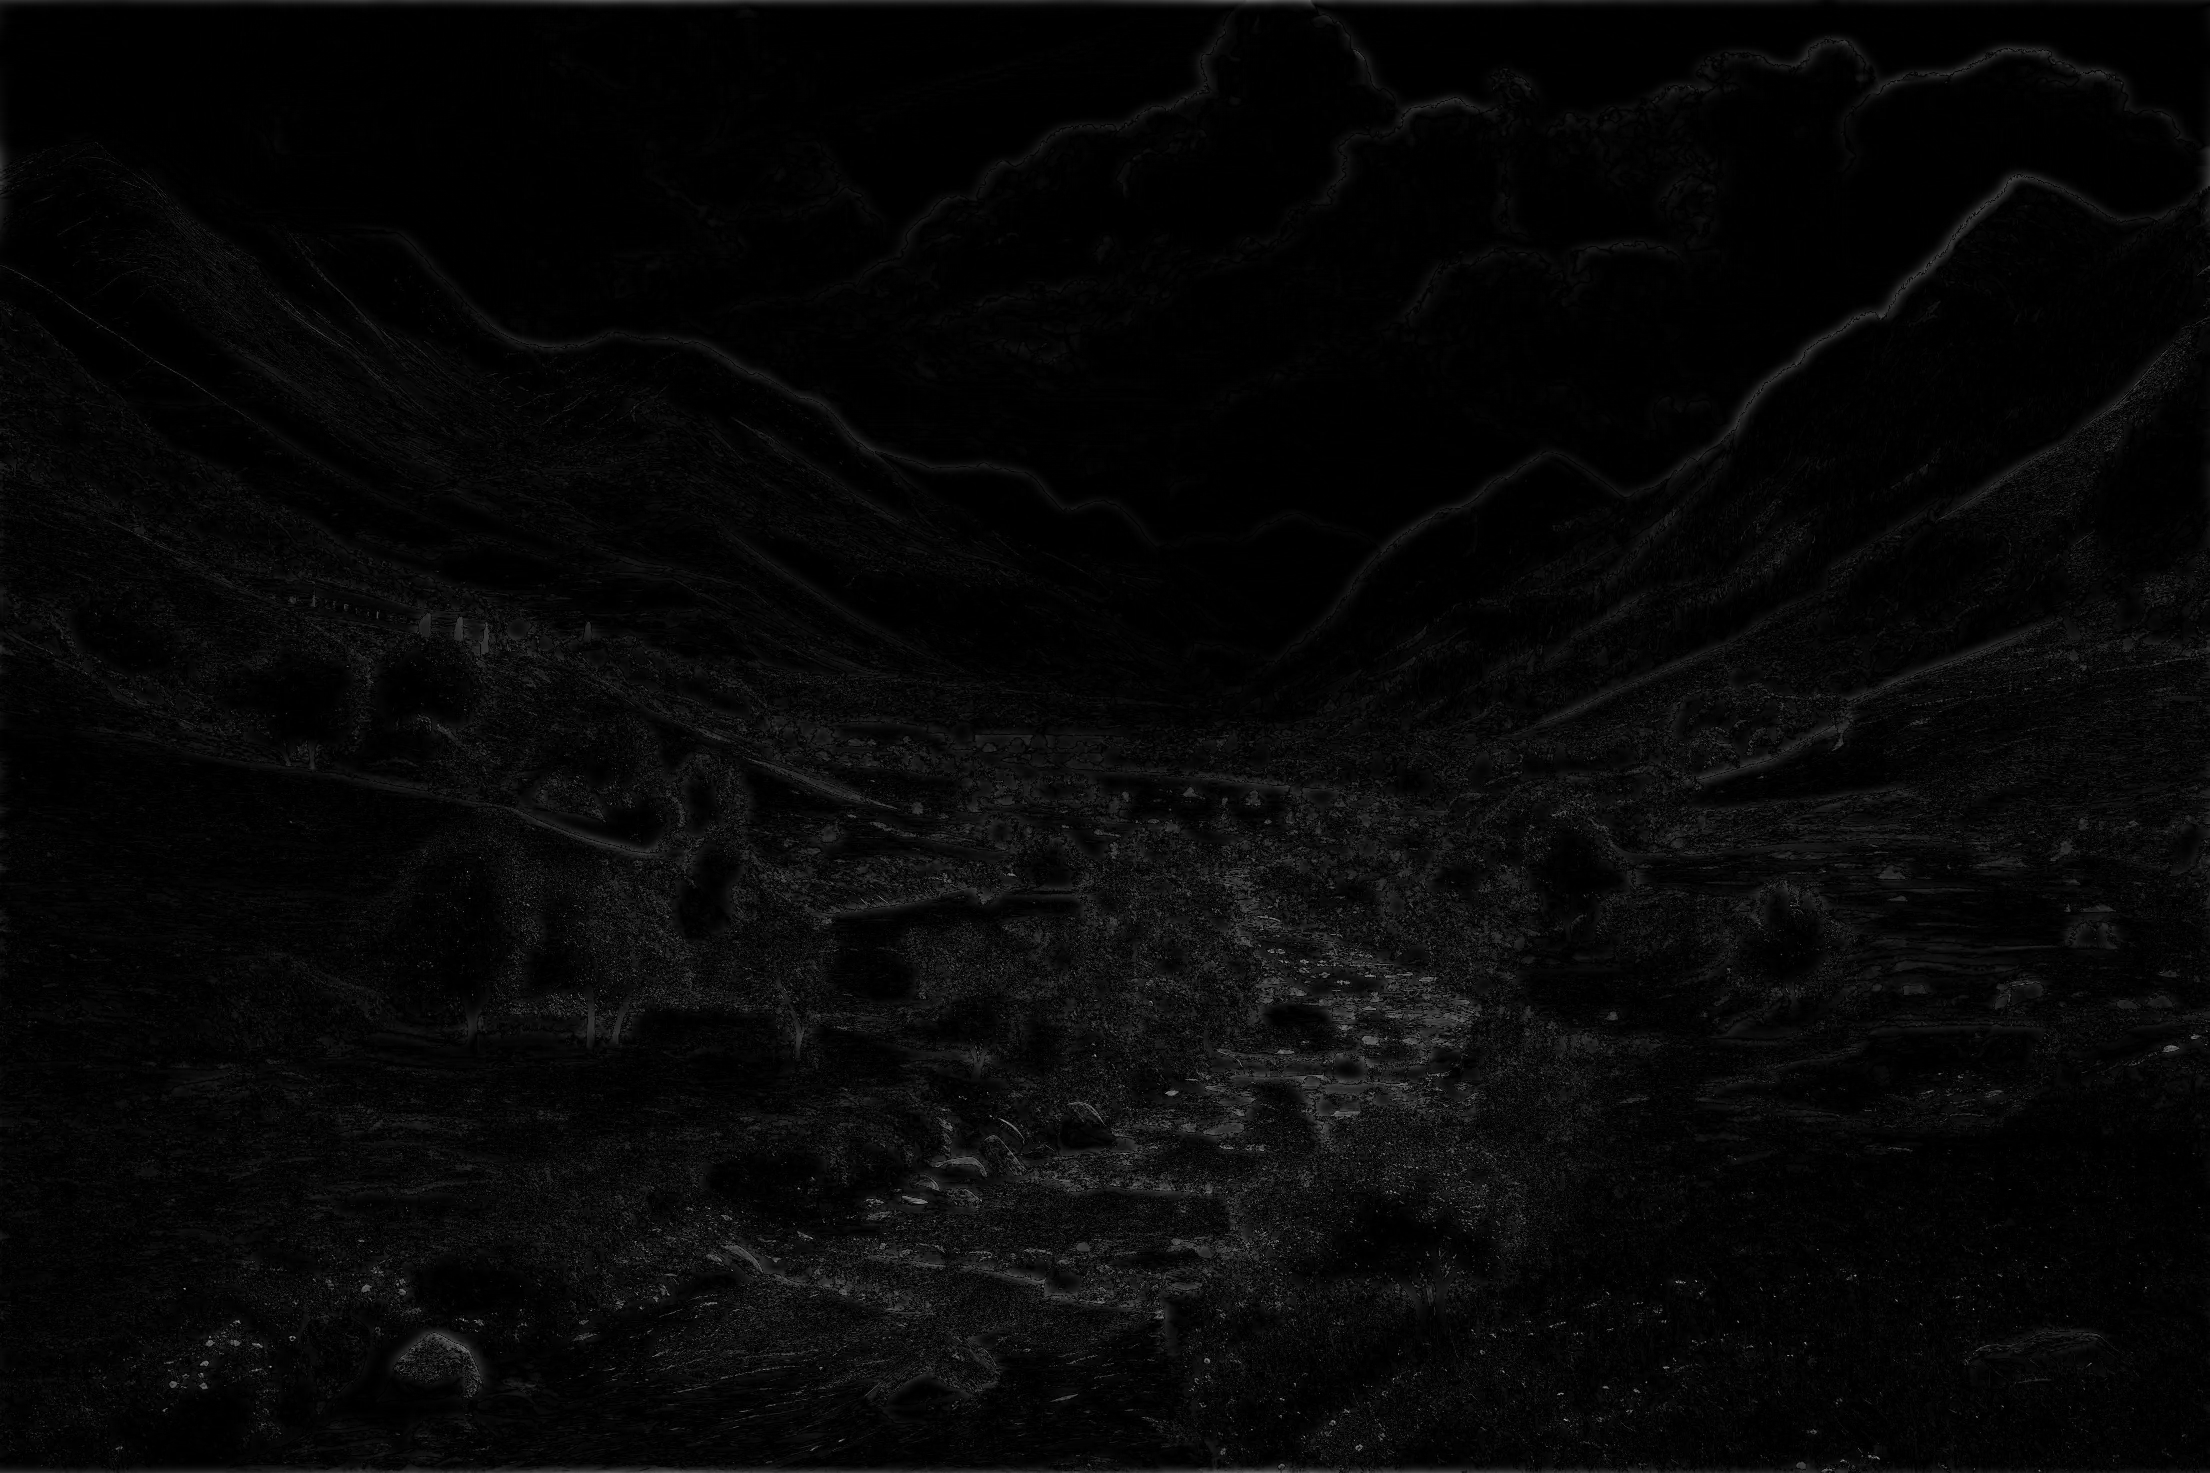

In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/beautiful-nature-scenery-free-photo (1).jpg', 0)
h, w = img.shape

F = np.fft.fft2(img)
Fshift = np.fft.fftshift(F)

H = np.zeros((h, w), dtype=np.float32)
D0 = 50

for i in range(h):
    for j in range(w):
        D = np.sqrt((i - h / 2) ** 2 + (j - w / 2) ** 2)
        H[i][j] = np.exp(-(D ** 2) / (2 * (D0 ** 2)))

# Gaussian high pass
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

# Display the Gaussian high pass filter
cv2_imshow(H)

# Display the resulting image after applying the Gaussian high pass filter
cv2_imshow(g)

# Gaussian low pass
H = 1 - H
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

# Display the Gaussian low pass filter
cv2_imshow(H)

# Display the resulting image after applying the Gaussian low pass filter
cv2_imshow(g)
